### 逼近法

In [1]:
import numpy as np
from pylab import plt, mpl

plt.style.use('seaborn-v0_8')
# plt.style.available
mpl.rcParams['font.family'] = 'serif'
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


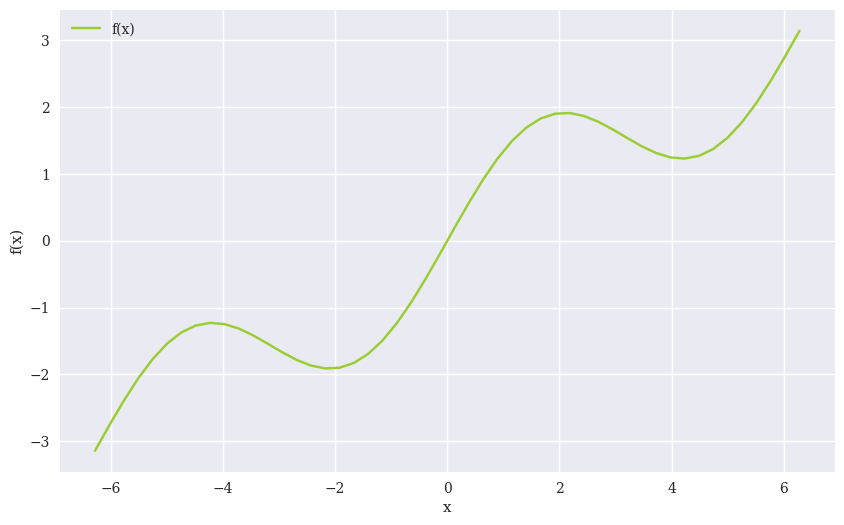

In [11]:
def f(x):
    return np.sin(x) + 0.5*x

def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

x = np.linspace(-2*np.pi, 2*np.pi, 50)
create_plot([x], [f(x)], ['yellowgreen'], ['f(x)'], ['x', 'f(x)'])

C:\Users\ORANGE\AppData\Local\Temp\ipykernel_14816\764915852.py:2: RuntimeWarning: invalid value encountered in sqrt
  return np.tan(x) + 3*np.exp(np.sqrt(x))


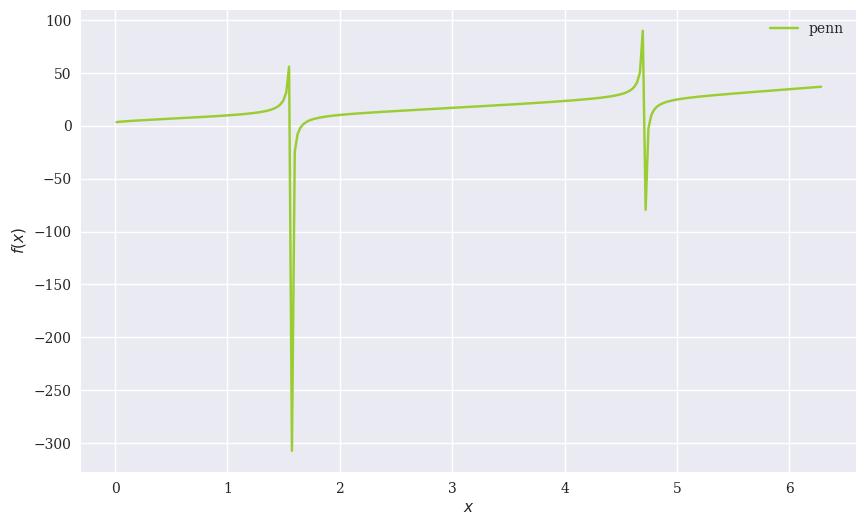

In [34]:
def f(x):
    return np.tan(x) + 3*np.exp(np.sqrt(x))

def create_draw(x, y, style, label, axlabels):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y, style, label=label)
    plt.xlabel(axlabels[0])
    plt.ylabel(axlabels[1])
    # plt.xlim(-2*np.pi-0.5, 2*np.pi+0.5)
    plt.legend()

x = np.linspace(-2*np.pi, 2*np.pi, 500)
y = f(x)
create_draw(x, y, 'yellowgreen', 'penn', ['$x$', '$f(x)$'])

IndexError: list index out of range

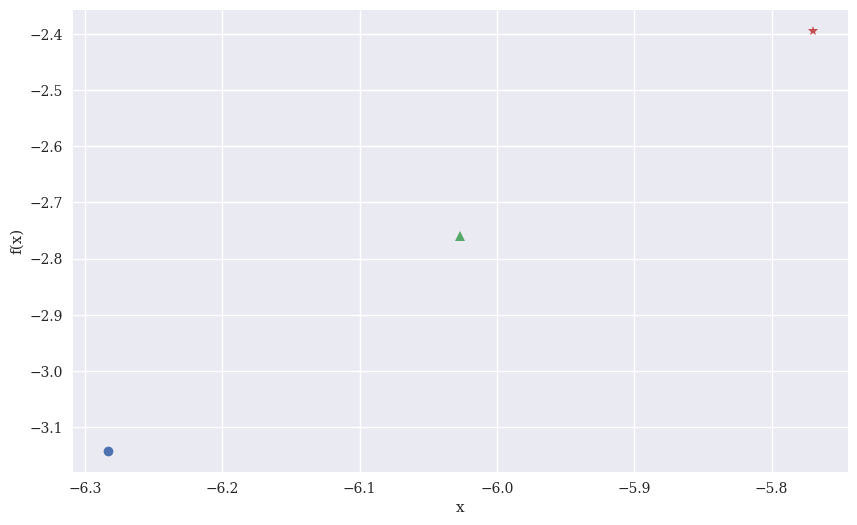

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) + 0.5*x

def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(y)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

x = np.linspace(-2*np.pi, 2*np.pi, 50)
y = [f(xi) for xi in x] 
create_plot(x, y, ['-o', '-^', '-*'], ['f(x)', 'sin(x)', '0.5x'], ['x', 'f(x)', 'sin(x)+0.5x'])
plt.show()

#### 1. 回归

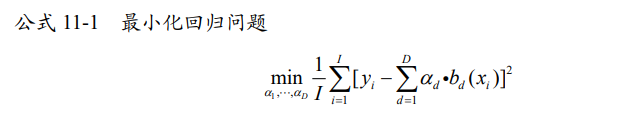

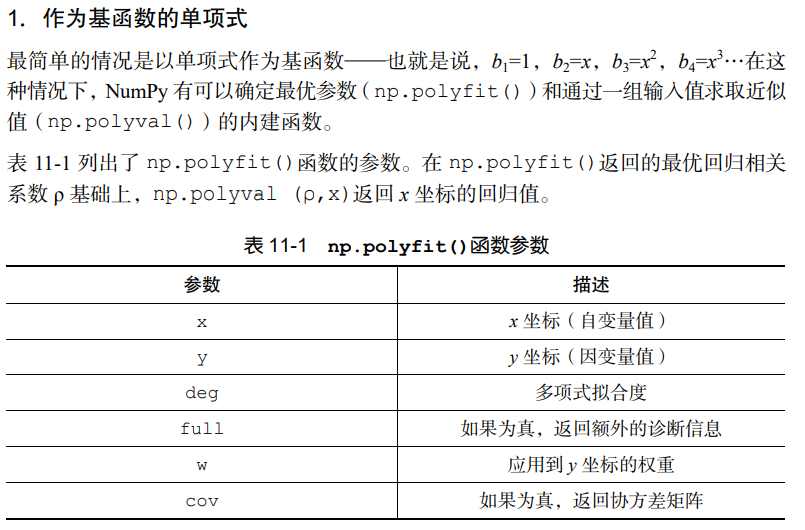

polyfit和polyval的使用

https://blog.csdn.net/ITman233/article/details/115968907

In [3]:
res = np.polyfit(x, f(x), deg=1, full=True)
res
# full默认值为False，只输出回归参数
# 完整的回归结果：回归参数、残差、有效秩、奇异值、相对条件数

(array([ 4.28841952e-01, -5.49532361e-17]),
 array([21.03238686]),
 2,
 array([1., 1.]),
 1.1102230246251565e-14)

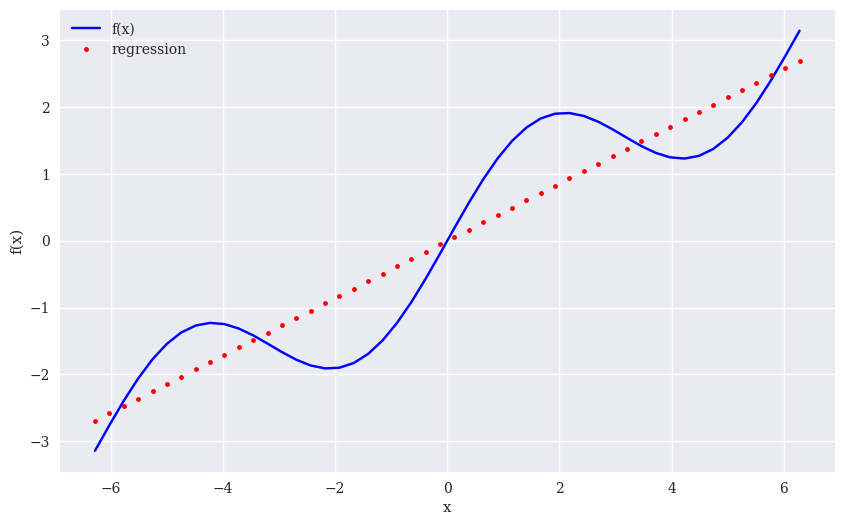

In [4]:
ry = np.polyval(res[0], x)

create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

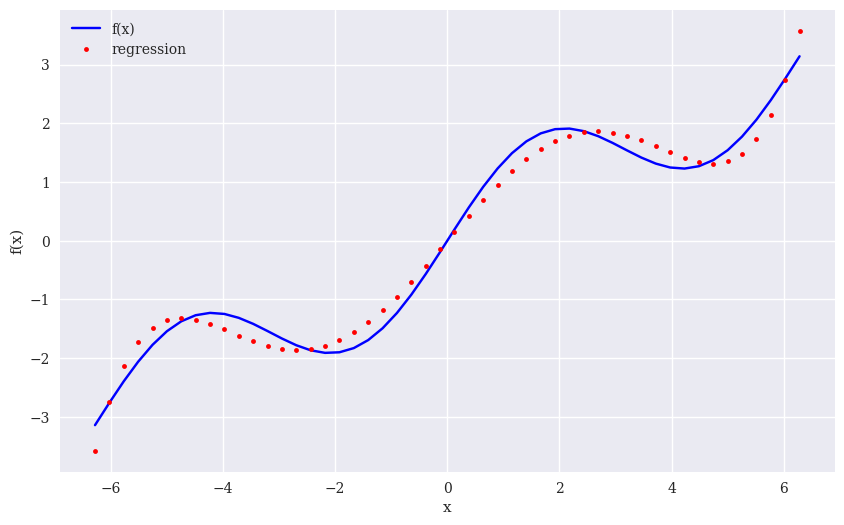

In [5]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)
create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

0.00177691347595176

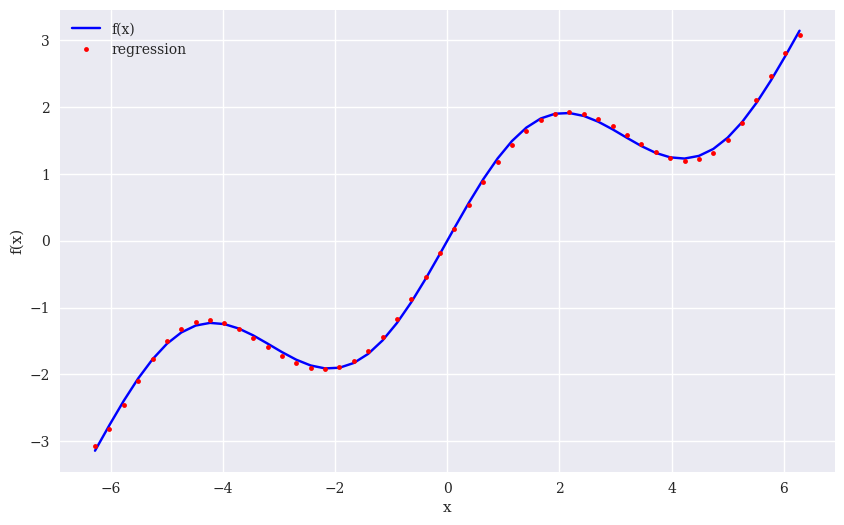

In [6]:
reg = np.polyfit(x, f(x), deg=7)
ry = np.polyval(reg, x)
create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

np.mean((f(x)-ry)**2)           # 根据函数值计算回归值均方差

指数拟合程序

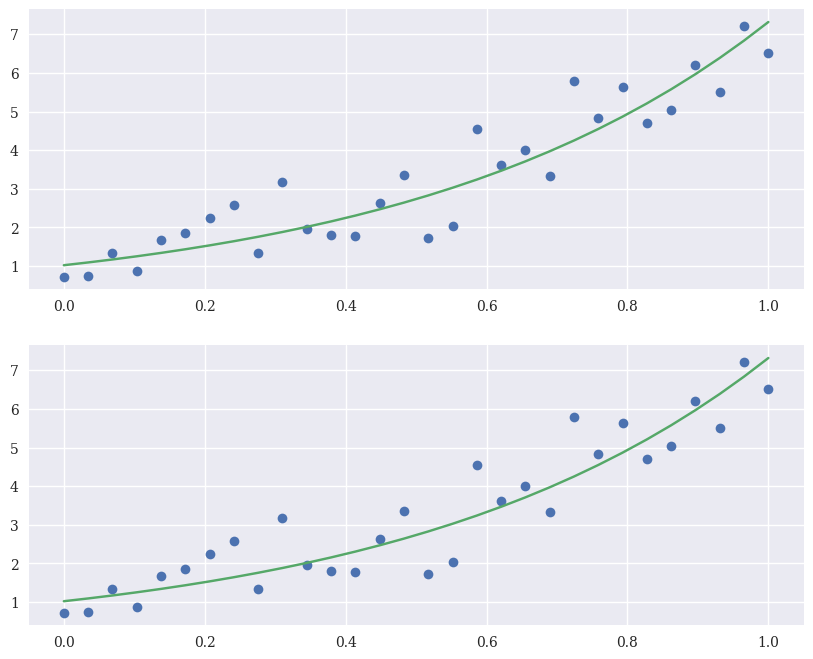

In [7]:
from numpy.random import randn
num = 30
x = np.linspace(0, 1, num)
error = randn(num)

A0 = 1
B0 = 2
a = A0 * np.exp(B0*x) + 0.5 * error

sh = np.log(a)

p = np.polyfit(x, sh, deg=1)

B = p[0]
A = np.exp(p[1])
y1 = A * np.exp(B*x)

sh2 = np.polyval(p, x)
y2 = np.exp(sh2)

fig = plt.figure(figsize=(10,8))
plt.subplot(2, 1, 1)
plt.plot(x, a, 'o', x, y1, '-')

plt.subplot(2, 1, 2)
plt.plot(x, a, 'o', x, y2, '-')

#### 2. 单独的基函数

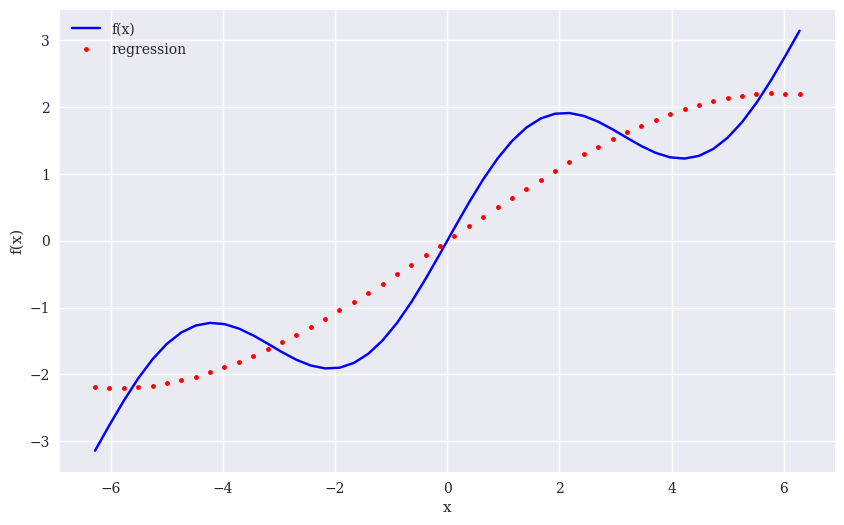

In [35]:
def f(x):
    return np.sin(x) + 0.5*x

def create_plot(x, y, styles, labels, axlabels):
    plt.figure(figsize=(10, 6))
    for i in range(len(x)):
        plt.plot(x[i], y[i], styles[i], label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

x = np.linspace(-2*np.pi, 2*np.pi, 50)

matrix = np.zeros((3+1, len(x)))            # 基函数值（矩阵）所用的ndarray对象
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1                            # 从函数到三次基函数值

reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]    # 回归步骤
    # np.linalg.lstsq是NumPy的一个函数，用于解决最小二乘问题，特别是当设计矩阵是列满秩的时候
    # rcond=None是一个参数，用于指定在计算奇异值分解时应该保留多少个奇异值。
    # 如果你不指定rcond=None，那么默认值是A-r*I中非对角线上最后一个非零元素的位置

    # np.linalg.lstsq会返回四个值：最小二乘解，残差和，秩，以及X的奇异值。
    # 通过[0]选择了第一个返回值，也就是最小二乘解。这个解被赋值给了变量reg。

ry = np.dot(reg, matrix)        # np.dot用于计算两个数组的点积，类似模

create_plot([x, x], [f(x), ry], ['b', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])


因为知道f(x)中是包含sin(x)的，所以将基函数中的最高次的单项式替换成sin(x)，能产生较好的拟合

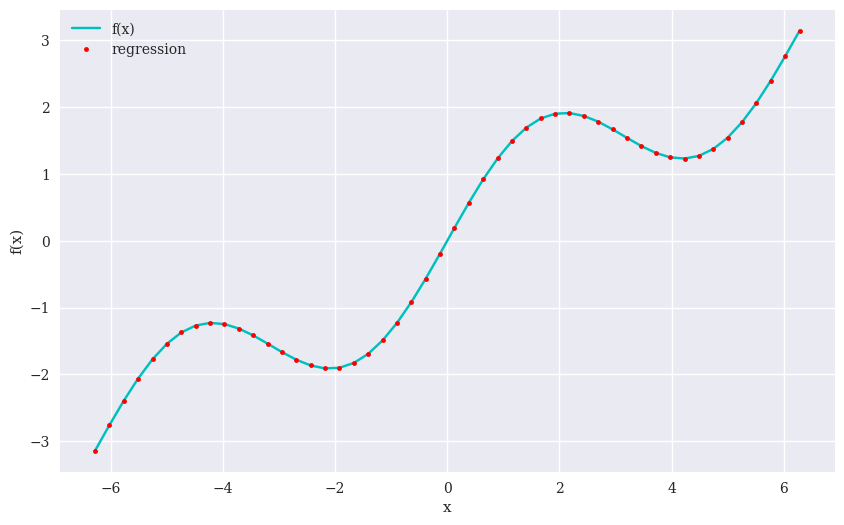

In [40]:
matrix[3, :] = np.sin(x)

reg = np.linalg.lstsq(matrix.T, f(x), rcond=None)[0]
ry = np.dot(reg, matrix)
create_plot([x, x], [f(x), ry], ['c', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

#### 3. 有噪声的数据——某种意义上，回归在一定程度上平均了噪声

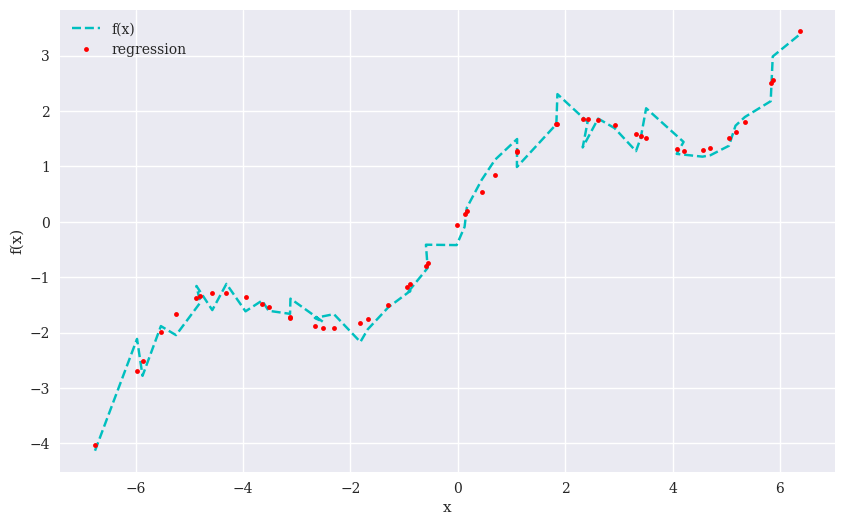

In [10]:
xn = np.linspace(-2*np.pi, 2*np.pi, 50)
xn = xn + 0.15*np.random.standard_normal(len(xn))
yn = f(xn) + 0.25*np.random.standard_normal(len(xn))

reg = np.polyfit(xn, yn, deg=7)
ry = np.polyval(reg, xn)

create_plot([xn, xn], [yn, ry], ['c--', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

#### 4. 未排序的数据——回归可无缝地处理未排序的数据

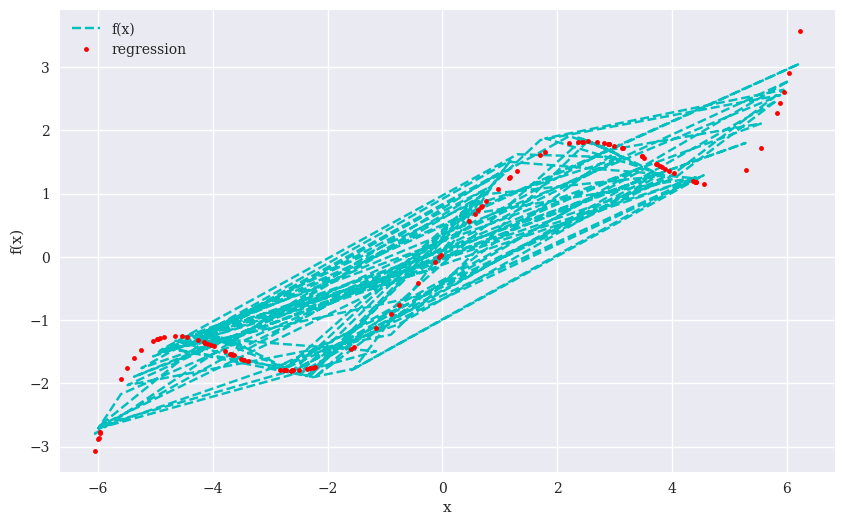

In [11]:
xu = np.random.rand(100)*4*np.pi - 2*np.pi
yu = f(xu)

reg = np.polyfit(xu, yu, deg=5)
ry = np.polyval(reg, xu)

create_plot([xu, xu], [yu, ry], ['c--', 'r.'], ['f(x)', 'regression'], ['x', 'f(x)'])

#### 5. 多维

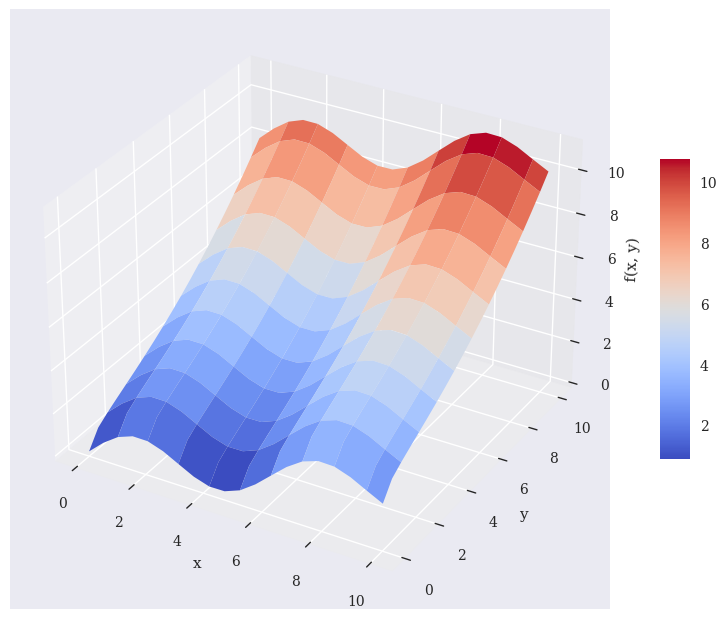

In [42]:
from mpl_toolkits.mplot3d import Axes3D

def fm(p):
    x, y = p
    return np.sin(x) + 0.25*x + np.sqrt(y) + 0.05*y**2

x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)

Z = fm((X, Y))
# X = X.flatten()
# Y = Y.flatten()

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes(Axes3D(fig)) 
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm', linewidth=0.5, antialiased=True)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

fig.colorbar(surf, shrink=0.5, aspect=10)

np.dot

https://blog.csdn.net/skywalker1996/article/details/82462499

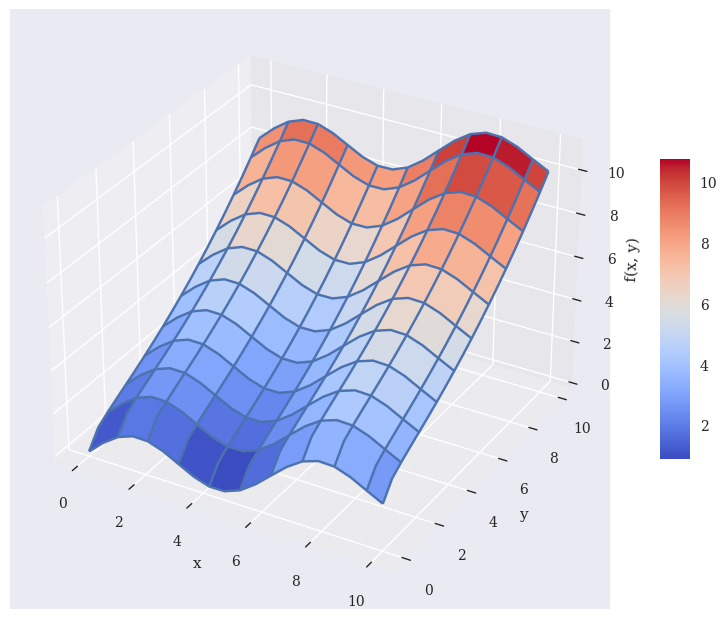

In [46]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)

matrix = np.zeros((len(x), 6+1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y**2
matrix[:, 3] = x**2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

reg = np.linalg.lstsq(matrix, Z, rcond=None)[0]
RZ = np.dot(matrix, reg).reshape((20, 20))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes(Axes3D(fig))
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True, label='f(x, y)')
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2, label='regression')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
# ax.legend()
fig.colorbar(surf1, shrink=0.5, aspect=10)

#### 插值

样条插值

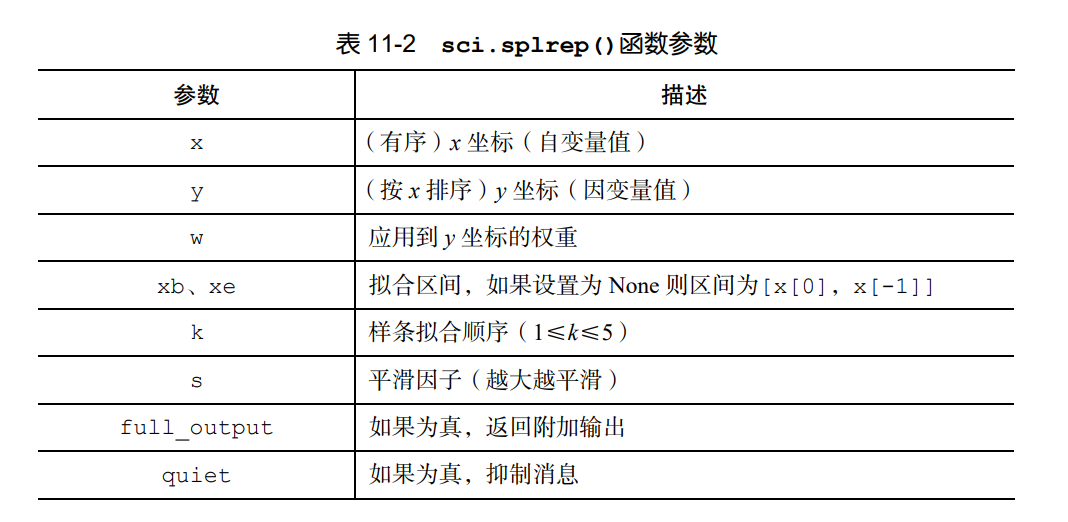

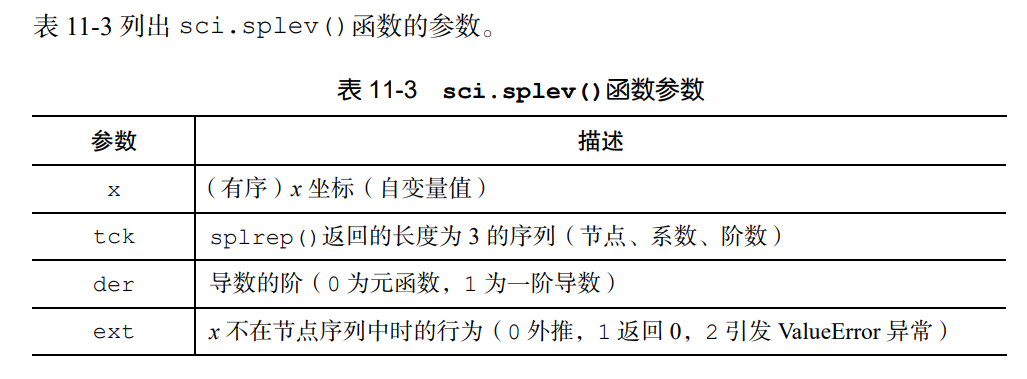

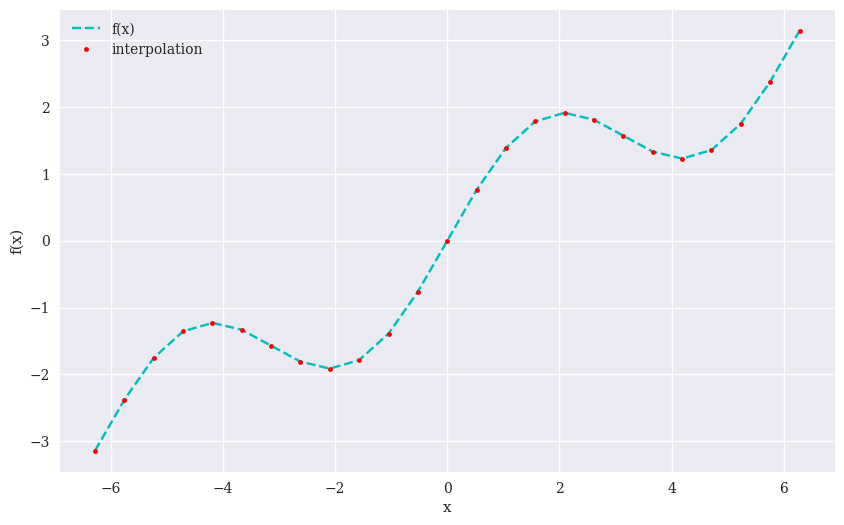

In [14]:
import scipy.interpolate as spi

x = np.linspace(-2*np.pi, 2*np.pi, 25)

def f(x):
    return np.sin(x) + 0.5*x

ipo = spi.splrep(x, f(x), k=1)          # 实现线性样条插值
iy = spi.splev(x, ipo)                  # 得出内插值

create_plot([x, x], [f(x), iy], ['c--', 'r.'], ['f(x)', 'interpolation'], ['x', 'f(x)'])

插值函数确实可以线性地在两个观测点之间插值，但不够精确

函数在原始数据点上不是连续可微分的

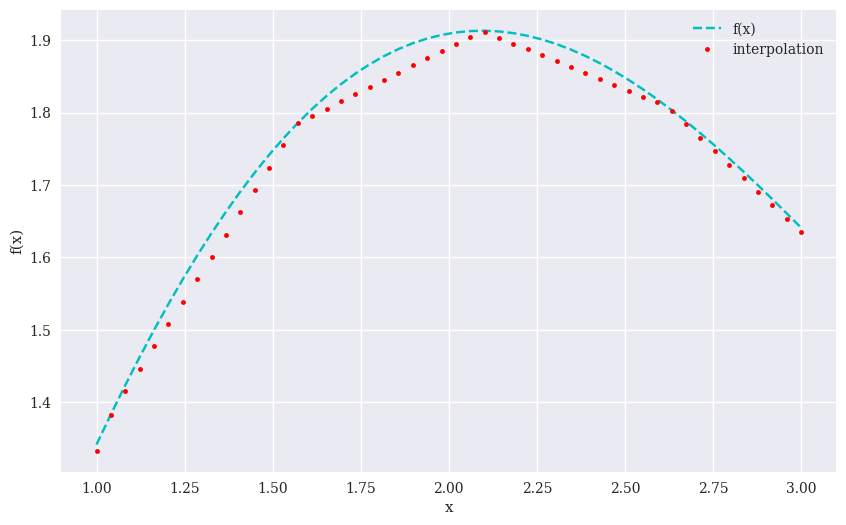

In [15]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

create_plot([xd, xd], [f(xd), iyd], ['c--', 'r.'], ['f(x)', 'interpolation'], ['x', 'f(x)'])

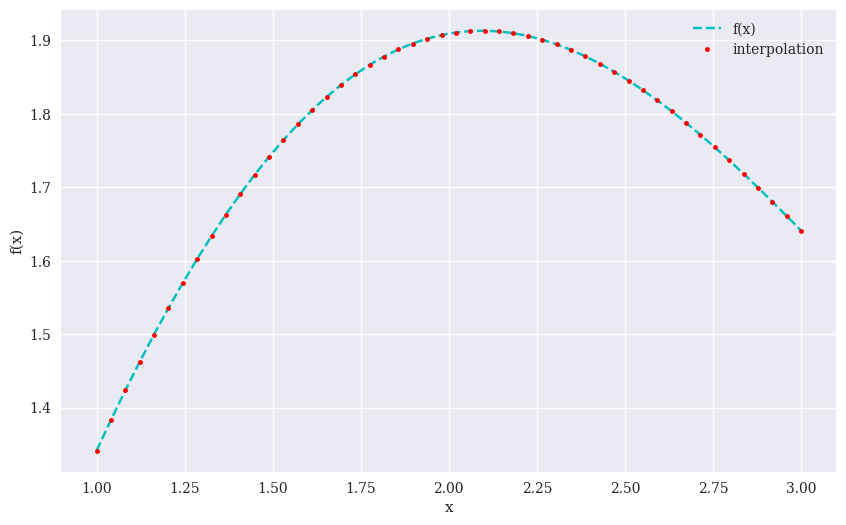

In [16]:
ipo = spi.splrep(x, f(x), k=3)
iyd = spi.splev(xd, ipo)

create_plot([xd, xd], [f(xd), iyd], ['c--', 'r.'], ['f(x)', 'interpolation'], ['x', 'f(x)'])

### 凸优化

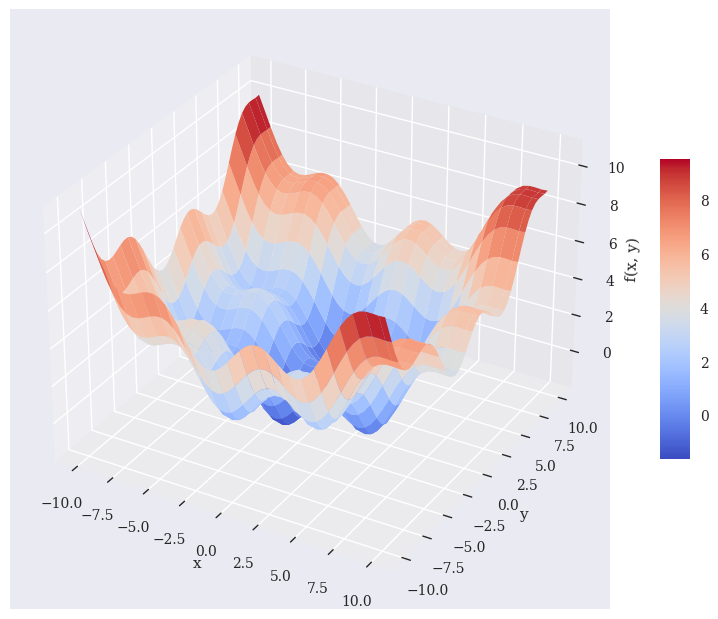

In [19]:
def fm(p):
    x, y = p
    return (np.sin(x) + 0.05*x**2 + np.sin(y) + 0.05*y**2)

x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes(Axes3D(fig))
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap='coolwarm', linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=10)

#### 全局优化
全局最小化——sco.brute()，用暴力方法在指定的范围内搜索最优解

局部最小化——sco.fmin()

In [25]:
import scipy.optimize as sco

def fo(p):
    x, y = p
    z = np.sin(x) + 0.05*x**2 + np.sin(y) + 0.05*y**2
    if output == True:
        print('%8.4f | %8.4f | %8.4f' % (x, y, z))
    return z

output = True
opt = sco.brute(fo, ((-10, 10.1, 5), (-10, 10.1, 5)), finish=None)        # 得到最优参数值为x=y=0
print(opt)
fo(opt)

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120
[0. 0.]
  0.0000 |   0.0000 |   0.0000


0.0

In [24]:
output = False
opt1 = sco.brute(fo, ((-10, 10.1, 0.1), (-10, 10.1, 0.1)), finish=None)         # 得到最优参数值为x=y=-1.4，全局优化的最小函数值大约为-1.7749
    # fo应该是你要优化的函数，而((-10, 10.1, 5), (-10, 10.1, 5))是你要搜索的参数范围。每个元组都包含两个值，第一个是参数的下限，第二个是参数的上限。第三个值是参数的步长
    # finish参数是一个函数，用于在找到局部最优解后进行最后一次优化。如果finish为None，那么在找到局部最优解后，将不再进行进一步的优化
print(opt1)
fo(opt1)

[-1.4 -1.4]


-1.7748994599769203

#### 局部优化

In [28]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)
    # fo是你的目标函数，opt1是算法的初始猜测值，xtol和ftol分别代表了算法在收敛时对目标函数和参数的容忍程度，maxiter和maxfun则分别代表了算法的最大迭代次数和最大函数调用次数
print(opt2)
print(fo(opt2))

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757
[-1.42702972 -1.42876755]
 -1.4270 |  -1.4288 |  -1.7757
-1.7757246992239009


C:\Users\ORANGE\AppData\Local\Temp\ipykernel_13620\1698776845.py:2: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001, maxiter=15, maxfun=20)


盆地跳跃：陷入某个局部最小值

故在局部优化之前先进行全局优化

In [30]:
output = False
sco.fmin(fo, (2.0, 2.0), maxiter=250)       
    # 初始猜测值为(2.0, 2.0)，并且设置了最大迭代次数为250
    # maxiter=250表示函数fo的最大迭代次数为250。如果在250次迭代后无法找到更好的解，函数将停止并返回当前找到的最优解


Optimization terminated successfully.
         Current function value: 0.015826
         Iterations: 46
         Function evaluations: 86


array([4.2710728 , 4.27106945])

#### 有约束优化

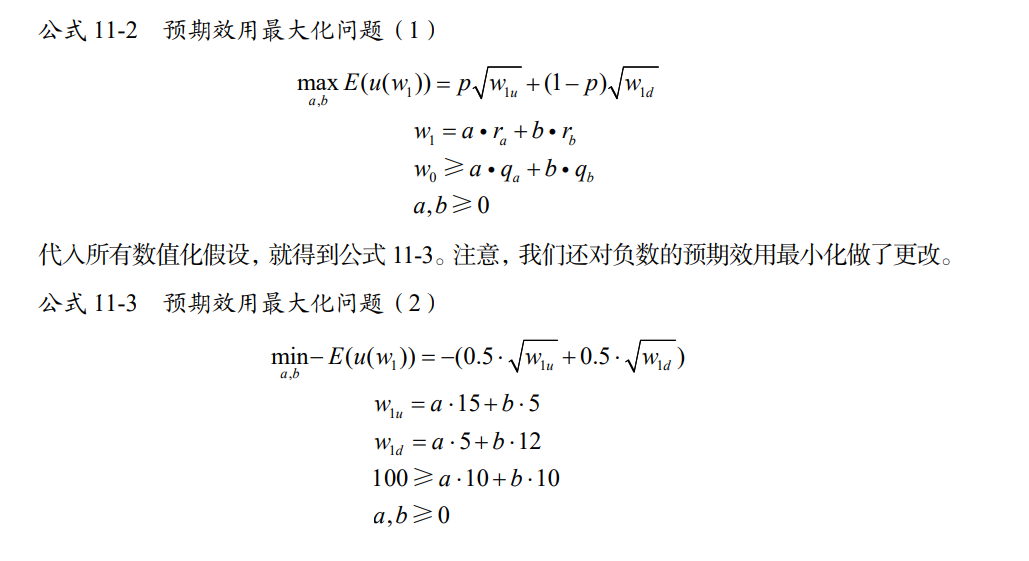

In [32]:
import math

def Eu(p):
    s, b = p
    return -(0.5*math.sqrt(s*15+b*5) + 0.5*math.sqrt(s*5+b*12))

cons = ({'type': 'ineq', 'fun': lambda p: 100 - p[0]*10 - p[1]*10})                 # 字典对象形式的不等式约束
bnds=((0, 1000), (0, 1000))                                                         # 参数边界值
result = sco.minimize(Eu, [5, 5], method='SLSQP', bounds=bnds, constraints=cons)    # 约束优化
    # Eu: 这是你的目标函数，它接受一个二元组 p（在这里是 p[0] 和 p[1]）并返回一个标量值。你的目标是最小化这个函数的值。
    # [5, 5]: 这是你的起始点，也就是优化算法开始搜索最小值的初始点。
    # method='SLSQP': 这是优化算法的名称。SLSQP 是Sequential Least SQuares Programming的缩写，它是一种优化算法，常用于非线性优化问题。
    # bounds=bnds: 这是每个参数的上下界。在这里，p[0] 和 p[1] 的下界都是0，上界都是1000。
    # constraints=cons: 这是约束条件。在这个例子中，只有一个约束条件，即 100 - p[0]*10 - p[1]*10 >= 0。这是在告诉你，优化过程要保证这个不等式成立。
result

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -9.700883611487832
       x: [ 8.025e+00  1.975e+00]
     nit: 5
     jac: [-4.851e-01 -4.849e-01]
    nfev: 16
    njev: 5

In [34]:
print(result['x'])
print(-result['fun'])
np.dot(result['x'], [10, 10])

[8.02547122 1.97452878]
9.700883611487832


99.99999999999999

### 积分

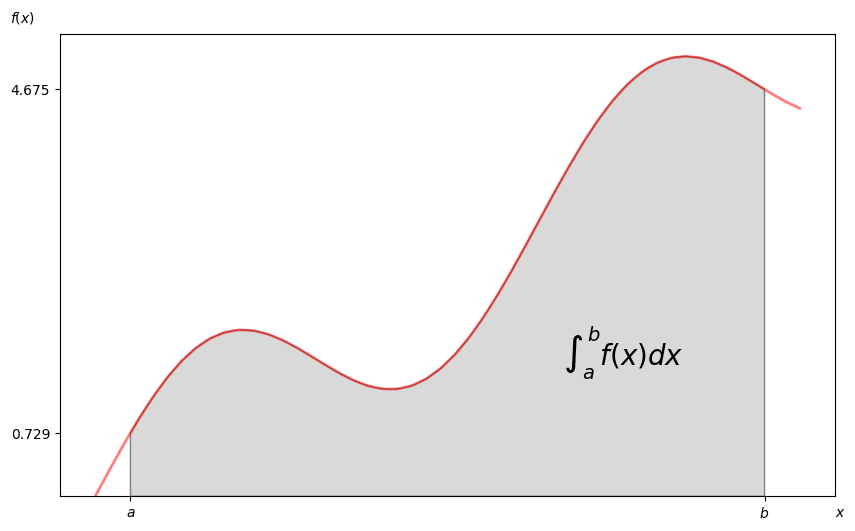

In [14]:
import scipy.integrate as sci
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

def f(x):
    return np.sin(x) + 0.5*x

x = np.linspace(0, 10)
y = f(x)
a = 0.5
b = 9.5
Ix = np.linspace(a, b)
Iy = f(Ix)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(x, y, 'r', linewidth=2, alpha=0.5)
plt.ylim(bottom=0)

verts = [(a, 0)] + list(zip(Ix, Iy)) + [(b, 0)]
poly = Polygon(verts, facecolor='0.85', edgecolor='0.5')
ax.add_patch(poly)

plt.text(0.75*(a+b), 1.5, r"$\int_a^b f(x)dx$", horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

ax.set_xticks((a,b))
ax.set_xticklabels(('$a$', '$b$'))
ax.set_yticks([f(a), f(b)])

#### 数值积分

固定高斯求积

In [15]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

自适应求积

In [18]:
sci.quad(f, a, b)[0]

24.374754718086752

龙贝格积分

In [19]:
sci.romberg(f, a, b)

24.374754718086713

梯形法则

In [21]:
xi = np.linspace(0.5, 9.5, 25)

sci.trapz(f(xi), xi)

24.352733271544516

辛普森法则

In [22]:
sci.simps(f(xi), xi)

24.37496418455075

#### 模拟求取积分

下列代码说明蒙特卡洛估算积分值随着提取随机数个数的增加而收敛

In [23]:
for i in range(1, 20):
    np.random.seed(1000)
    x = np.random.random(i*10) * (b-a) + a
    print(np.mean(f(x)) * (b-a))

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


### 符号计算

In [31]:
import sympy as sy

x = sy.Symbol('x')              # 定义所要处理的符号
y = sy.Symbol('y')

sy.sqrt(x)                      # 对符号应用函数
print(3 + sy.sqrt(x) - 4**2)

f = x**2 + 3 + 0.5*x**2 +3/2
print(sy.simplify(f))

sqrt(x) - 13
1.5*x**2 + 4.5


In [34]:
sy.init_printing(pretty_print=False, use_unicode=False)
print(sy.pretty(f))
print(sy.pretty(sy.sqrt(x) + 0.5))

     2      
1.5*x  + 4.5
  ___      
\/ x  + 0.5


In [35]:
%time pi_str = str(sy.N(sy.pi, 400000))

CPU times: total: 9.97 s
Wall time: 10 s


In [39]:
%time pi_str.find('001006')

CPU times: total: 0 ns
Wall time: 0 ns


-1

#### 方程式

In [40]:
sy.solve(x**2 - 1)

[-1, 1]

In [41]:
sy.solve(x**2 - 1 - 3)

[-2, 2]

In [42]:
sy.solve(x**3 + 0.5*x**2 -1)

[0.858094329496553, -0.679047164748276 - 0.839206763026694*I, -0.679047164748276 + 0.839206763026694*I]

In [46]:
sy.solve(x**2 + y**2)

[{x: -I*y}, {x: I*y}]

#### 积分

In [48]:
a, b = sy.symbols('a b')
I = sy.Integral(sy.sin(x) + 0.5*x, (x, a, b))       # 定义Integral对象并以漂亮的格式打印
print(sy.pretty(I))

int_func = sy.integrate(sy.sin(x) + 0.5*x, x)
print(sy.pretty(int_func))

  b                    
  /                    
 |                     
 |  (0.5*x + sin(x)) dx
 |                     
/                      
a                      
      2         
0.25*x  - cos(x)


In [49]:
Fb = int_func.subs(x, 9.5).evalf()
Fa = int_func.subs(x, 0.5).evalf()

Fb - Fa

24.3747547180867

In [50]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5*x, (x, a, b))
print(sy.pretty(int_func_limits))

        2         2                  
- 0.25*a  + 0.25*b  + cos(a) - cos(b)


In [51]:
int_func_limits.subs({a: 0.5, b: 9.5}).evalf()

24.3747547180868

In [52]:
sy.integrate(sy.sin(x) + 0.5*x, (x, 0.5, 0.95))

0.459024472426489

#### 微分

In [53]:
int_func.diff()

0.5*x + sin(x)

In [55]:
f = (sy.sin(x) + 0.05*x**2 + sy.sin(y) + 0.05*y**2)


In [56]:
del_x = sy.diff(f, x)
del_x

0.1*x + cos(x)

In [57]:
del_y = sy.diff(f, y)
del_y

0.1*y + cos(y)

In [59]:
xo = sy.nsolve(del_x, -1.5)             # 对根和结果最优值进行有根据的推测
xo

-1.42755177876459

In [66]:
yo = sy.nsolve(del_y, -1.5)
yo

-1.42755177876459

In [67]:
f.subs({x: xo, y: yo}).evalf()

-1.77572565314742

In [69]:
xo = sy.nsolve(del_x, 1.5)
yo = sy.nsolve(del_y, 1.5)

f.subs({x: xo, y: yo}).evalf()

2.27423381055640